<a href="https://colab.research.google.com/github/Shiveringapple/DeepLearing/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train),(x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
trans = [
	"T-shirt/top",
	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"Ankle boot"
]

2


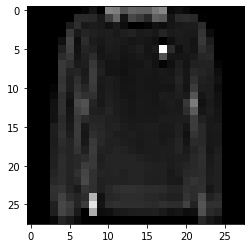

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
print(y_train[idx])
# cmap="gray"
plt.imshow(x_train[idx], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,6,21,2,131,126,84,100,96,95,120,134,10,16,9,0,0,0,0,0,0,0
1,0,0,0,0,0,0,42,42,40,24,63,102,20,71,59,40,96,88,21,42,45,41,2,0,0,0,0,0
2,0,0,0,0,0,28,46,25,28,26,17,26,13,0,0,6,18,14,22,25,28,28,45,0,0,0,0,0
3,0,0,0,0,0,57,25,37,32,28,30,25,30,34,26,28,24,36,26,28,26,25,53,12,0,0,0,0
4,0,0,0,0,16,68,14,44,28,24,29,28,25,22,24,22,17,0,16,26,25,20,56,28,0,0,0,0
5,0,0,0,0,32,64,17,37,32,21,28,26,22,25,30,20,26,255,45,16,26,20,48,37,0,0,0,0
6,0,0,0,0,45,56,20,32,44,22,24,25,20,22,25,22,18,80,22,21,22,26,38,40,0,0,0,0
7,0,0,0,0,56,46,26,30,55,28,20,21,18,21,21,25,18,5,16,29,20,32,34,34,6,0,0,0
8,0,0,0,0,57,34,37,26,61,32,20,20,17,22,24,24,22,25,22,33,22,41,36,33,14,0,0,0
9,0,0,0,0,53,29,46,29,61,26,29,25,20,21,24,22,22,24,25,36,22,49,33,29,18,0,0,0


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
layers = [
    # param = 784*256 + 256(bias)
    Dense(256, activation="relu", input_dim=784),
    # param = 128*10(連線個數) + 10(bias)(偏移) 或寫成 (256+1)*10 
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Loss: 跟正確答案的距離
# 如果用MSE 坡度會太小 不能用
# Entropy熵: 亂度，從微觀的角度，越穩的東西越亂
# Entropy = P1(log1-logP1) + P2(log1-logP2) = P1log1/P1 + P2log1/P2
# 交叉熵 = P1 * log(1/q1) + P2 * log(1/q2)
# 多個：Categorical CrossEntropy
# 一個：Binary CrossEntropy p * log(1/q) + (1-p) * log(1/1-q)

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# 資料處理：x
# -1是請電腦幫你算，實際上是上面shape的60000，限一個
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [ ]:
# batch：看幾筆在調整一次(20~200筆)
# epochs：整份訓練資料看幾遍(10 -> 60000*10)
# verbose: 0(quiet) 1(default) 2(necessary)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
270/270 - 2s - loss: 0.5709 - accuracy: 0.8052 - val_loss: 0.4690 - val_accuracy: 0.8377
Epoch 2/100
270/270 - 2s - loss: 0.4065 - accuracy: 0.8575 - val_loss: 0.3804 - val_accuracy: 0.8615
Epoch 3/100
270/270 - 2s - loss: 0.3642 - accuracy: 0.8709 - val_loss: 0.3654 - val_accuracy: 0.8695
Epoch 4/100
270/270 - 2s - loss: 0.3348 - accuracy: 0.8796 - val_loss: 0.3635 - val_accuracy: 0.8735
Epoch 5/100
270/270 - 2s - loss: 0.3158 - accuracy: 0.8866 - val_loss: 0.3288 - val_accuracy: 0.8838
Epoch 6/100
270/270 - 2s - loss: 0.2935 - accuracy: 0.8933 - val_loss: 0.3308 - val_accuracy: 0.8807
Epoch 7/100
270/270 - 2s - loss: 0.2857 - accuracy: 0.8976 - val_loss: 0.3447 - val_accuracy: 0.8760
Epoch 8/100
270/270 - 2s - loss: 0.2724 - accuracy: 0.9016 - val_loss: 0.3164 - val_accuracy: 0.8835
Epoch 9/100
270/270 - 2s - loss: 0.2653 - accuracy: 0.9045 - val_loss: 0.3501 - val_accuracy: 0.8755
Epoch 10/100
270/270 - 2s - loss: 0.2528 - accuracy: 0.9069 - val_loss: 0.3056 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8863


[0.32414761185646057, 0.8863000273704529]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(tran[i]) for i in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),895,0,12,16,4,1,63,0,9,0
1(真實),3,965,0,24,4,0,4,0,0,0
2(真實),22,0,799,10,98,1,67,0,3,0
3(真實),43,4,10,876,38,1,23,0,5,0
4(真實),1,1,78,26,838,0,54,0,2,0
5(真實),0,0,0,1,0,962,0,22,2,13
6(真實),178,1,82,28,84,0,616,0,11,0
7(真實),0,0,0,0,0,27,0,935,1,37
8(真實),7,0,9,4,5,2,2,5,966,0
9(真實),0,0,0,0,0,10,1,24,0,965


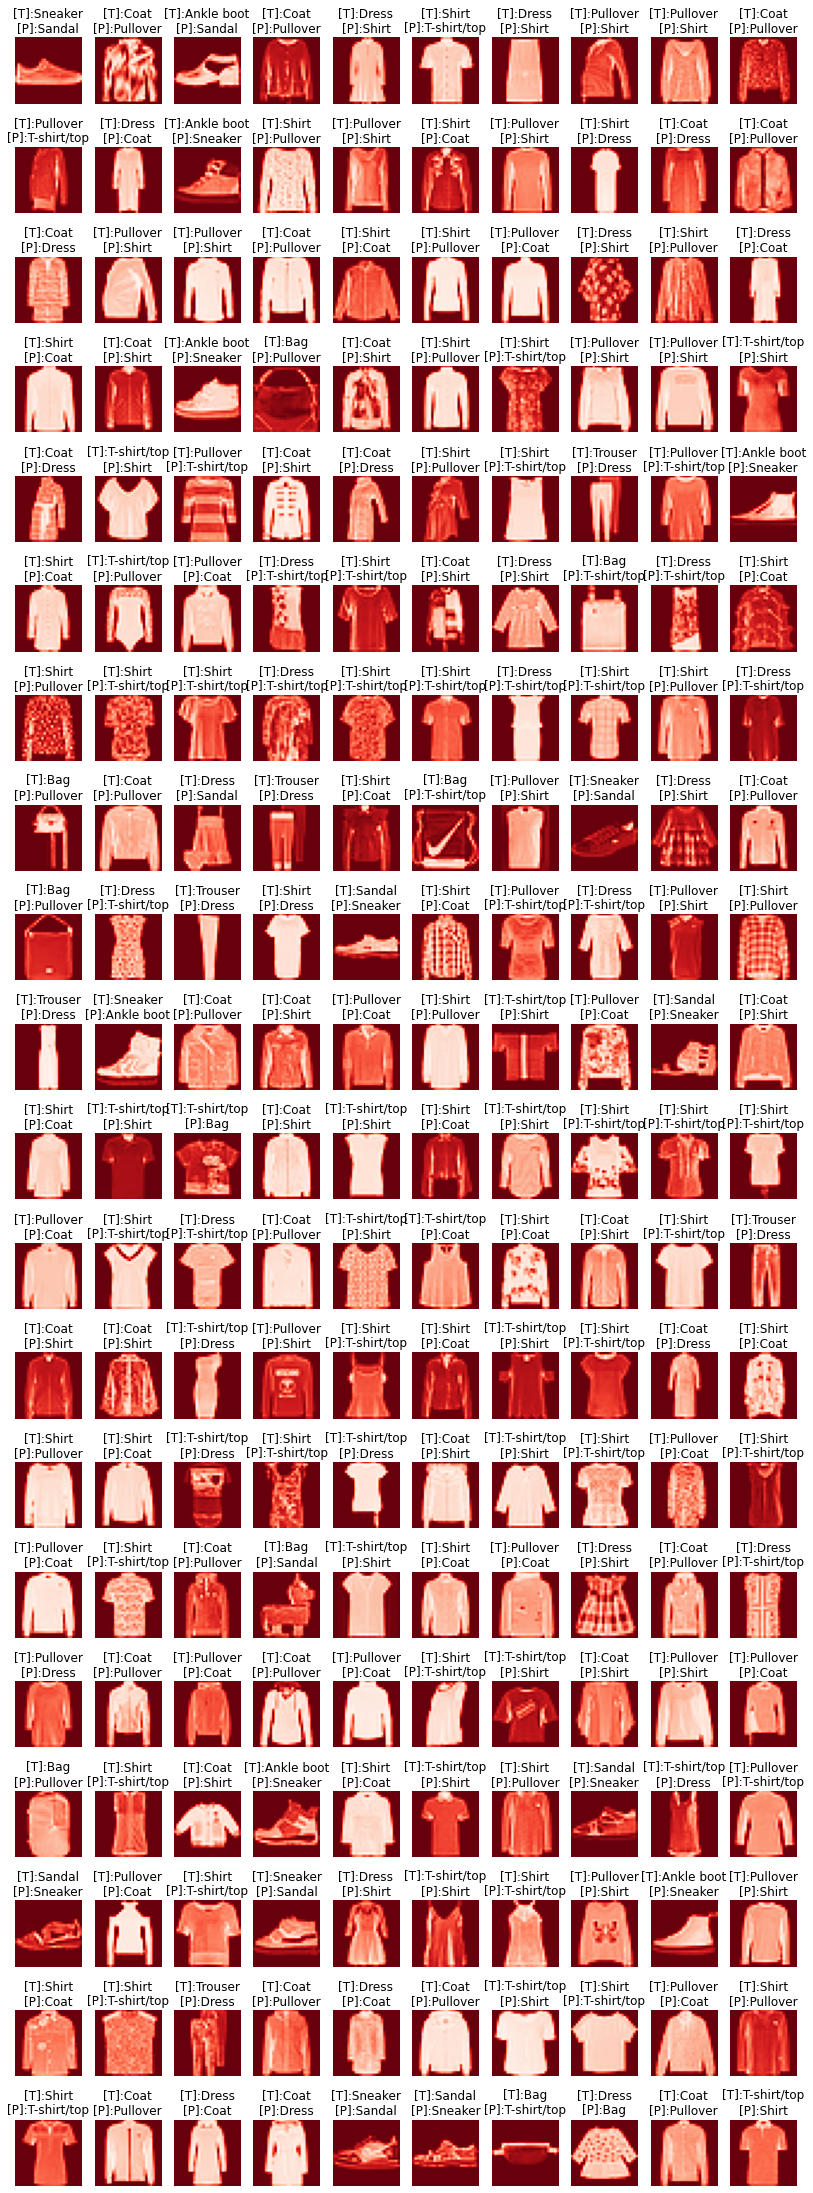

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
img, label, pred = x_test[idx], y_test[idx], pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[label[i]], trans[pred[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i], cmap="Reds_r")

檔名:test1.png
答案: Bag
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.0
3 的機率: 0.0
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.001
7 的機率: 0.0
8 的機率: 0.999
9 的機率: 0.0


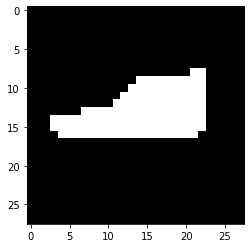

In [ ]:
# https://pillow.readthedocs.io/en/5.1.x/handbook/concepts.html#concept-modes
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)
print("答案:", trans[ans[0]])
prob = model.predict(img_norm)[0]
for i, p in enumerate(prob):
    print(i, "的機率:", round(p, 3))
plt.imshow(img, cmap="gray")